In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Read the following data found in datafile.dat into a matrix. Read the header of the file for data details.

In [2]:
matrix = np.loadtxt('data/datafile.dat',skiprows=20)
#matrix = matrix.astype(int)
#matrix = np.transpose(matrix)
#matrix = matrix.reshape((157, 253))


In [3]:
matrix

array([[ 1070.,  1059.,   922., ...,   631.,   611.,   613.],
       [  986.,   838.,   788., ...,   707.,   658.,   633.],
       [ 1138.,  1133.,   891., ...,   736.,   734.,   692.],
       ...,
       [-4401., -4400., -4397., ...,  2628.,  2424.,  2230.],
       [-4403., -4400., -4397., ...,  2689.,  2537.,  2368.],
       [-4431., -4393., -4397., ...,  2629.,  2589.,  2494.]])

In [4]:
matrix.shape

(157, 253)

2. Correctly display the data in the following forms:

a.Contour map with labels

b.Shaded continuous colored map with a colorbar.

c.Discrete colored contour (aka contour filled) map and/ora shaded map overlaid with contours. Also include a colorbar.

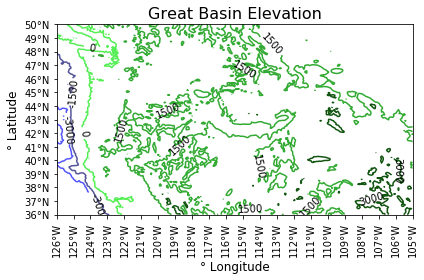

In [5]:
x,y = np.meshgrid(np.linspace(126,105,matrix.shape[1]),np.linspace(37,51,matrix.shape[0]))

cp = plt.contour(-x, -y, matrix, colors=["#0000ff", "#5555fc", "#555599", "#55ee55", "#33aa33","#115511"])

xlab = [str(i) + "°W" for i in range(126,104,-1)]
plt.xticks([i for i in range(-126,-104,1)], xlab)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

ylab = [str(i) + "°N" for i in range(36,51)]
plt.yticks([i for i in range(-51, -36,1)], ylab)

plt.ylabel("° Latitude", fontsize=12)
plt.xlabel("° Longitude", fontsize=12)
plt.title("Great Basin Elevation", fontsize=16)

plt.clabel(cp, inline=True, fontsize=10, colors=["#000000"], fmt="%1.f")
plt.tight_layout()
plt.savefig('UglyLabels.png', dpi=500)
plt.show()

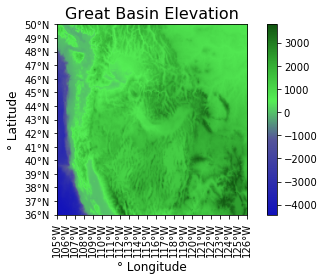

In [6]:
x,y = np.meshgrid(np.linspace(126,105,matrix.shape[1]),np.linspace(37,51,matrix.shape[0]))

colors = ["#1111bb", "#3333aa", "#555599", "#55ee55", "#33aa33","#115511"]

#cp = plt.contourf(-x, -y, matrix, colors=["#1111bb", "#3333aa", "#555599", "#55ee33", "#33aa33","#115511"])
#plt.colorbar(cp)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('MyMap',colors,256)

im = plt.imshow(matrix, interpolation='bilinear', origin='lower', cmap=cmap,extent=(-1,1,-1,1))
plt.colorbar(im)

xlab = [str(i) + "°W" for i in range(126,104,-1)]
plt.xticks(np.linspace(1,-1,22), xlab)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

ylab = [str(i) + "°N" for i in range(36,51)]
plt.yticks(np.linspace(1,-1,15), ylab)

plt.gca().invert_yaxis()

plt.ylabel("° Latitude", fontsize=12)
plt.xlabel("° Longitude", fontsize=12)
plt.title("Great Basin Elevation", fontsize=16)
plt.tight_layout()
plt.savefig('ColorMapContinuous.png', dpi=500)
plt.show()

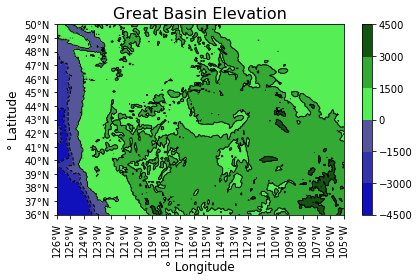

In [7]:
x,y = np.meshgrid(np.linspace(126,105,matrix.shape[1]),np.linspace(37,51,matrix.shape[0]))

cp = plt.contourf(-x, -y, matrix, colors=["#1111bb", "#3333aa", "#555599", "#55ee55", "#33aa33","#115511"])
plt.contour(-x, -y, matrix, linewidths=(1,), colors=["#000000"])
plt.colorbar(cp)

xlab = [str(i) + "°W" for i in range(126,104,-1)]
plt.xticks([i for i in range(-126,-104,1)], xlab)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

ylab = [str(i) + "°N" for i in range(36,51)]
plt.yticks([i for i in range(-51, -36,1)], ylab)

plt.ylabel("° Latitude", fontsize=12)
plt.xlabel("° Longitude", fontsize=12)
plt.title("Great Basin Elevation", fontsize=16)
plt.tight_layout()
plt.savefig('ColorMapNice.png', dpi=500)
plt.show()

[]
<a list of 0 Text xticklabel objects>


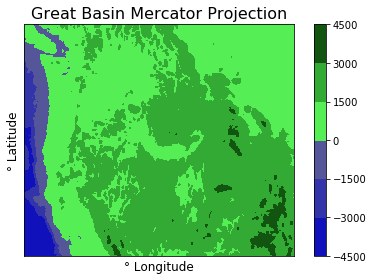

In [8]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=37,urcrnrlat=50,\
            llcrnrlon=-126,urcrnrlon=-105,lat_ts=20)
#m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
#m.drawmapboundary(fill_color='aqua')
#m.contour(x, y, matrix)

x = np.linspace(0, m.urcrnrx, matrix.shape[1])
y = np.linspace(0, m.urcrnry, matrix.shape[0])

xx, yy = np.meshgrid(x, y)

ctrs = m.contourf(xx, yy, matrix, colors=["#1111bb", "#3333aa", "#555599", "#55ee55", "#33aa33","#115511"])
#ctrs = m.pcolormesh(xx, yy, matrix, cmap=plt.get_cmap('terrain'))

locs, labels = plt.xticks()
print(locs)
print(labels)

ax = plt.gca()

#ax.set_xticks(np.arange(-1.0, 1.0, 0.1))
#ax.set_yticks(np.arange(-.5, 10, 1))
#ax.set_xticklabels(np.arange(1, 12, 1))
#ax.set_yticklabels(np.arange(1, 12, 1))

plt.gca().invert_yaxis()

plt.colorbar(ctrs)

plt.ylabel("° Latitude", fontsize=12)
plt.xlabel("° Longitude", fontsize=12)
plt.title("Great Basin Mercator Projection", fontsize=16)
plt.tight_layout()
plt.show()

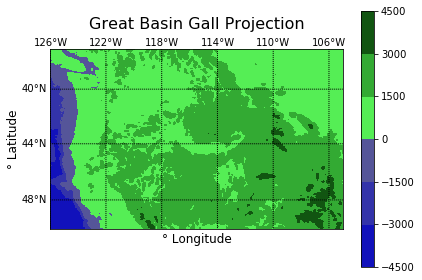

In [9]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='gall',llcrnrlat=37,urcrnrlat=50,\
            llcrnrlon=-126,urcrnrlon=-105,lat_ts=20)

#m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
#m.drawmapboundary(fill_color='aqua')
#m.contour(x, y, matrix)

x = np.linspace(0, m.urcrnrx, matrix.shape[1])
y = np.linspace(0, m.urcrnry, matrix.shape[0])

xx, yy = np.meshgrid(x, y)

ctrs = m.contourf(xx, yy, matrix, colors=["#1111bb", "#3333aa", "#555599", "#55ee55", "#33aa33","#115511"])
#ctrs = m.pcolormesh(xx, yy, matrix, cmap=plt.get_cmap('terrain'))

plt.gca().invert_yaxis()

plt.colorbar(ctrs)

parallels = np.arange(0.,81,4.)
m.drawparallels(parallels,labels=[True,False,False,True])
meridians = np.arange(10.,351.,4.)
result = m.drawmeridians(meridians,labels=[False,True,True,False])
for key, (lines,texts) in result.items():
    for text in texts:
        x,y = text.get_position()
        text.set_position((x,-12000))

plt.ylabel("° Latitude", fontsize=12, labelpad=30)
plt.xlabel("° Longitude", fontsize=12)
plt.title("Great Basin Gall Projection", fontsize=16, y=1.08)
plt.tight_layout()
plt.savefig('greatbasingall.png', dpi=500)
plt.show()